In [1]:
import numpy
import pandas
import math
import matplotlib.pyplot as plt

In [2]:
data=pandas.read_csv("heartdisease.csv",header=0,usecols=[0,1,2,4,5,6,7,8,9,10,12,13,14],converters={i: str for i in range(16)})
data

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
0,1,39,4,0,0,0,0,0,195,106,26.97,80,77
1,0,46,2,0,0,0,0,0,250,121,28.73,95,76
2,1,48,1,20,0,0,0,0,245,127.5,25.34,75,70
3,0,61,3,30,0,0,1,0,225,150,28.58,65,103
4,0,46,3,23,0,0,0,0,285,130,23.1,85,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1,0,0,1,0,313,179,25.97,66,86
4234,1,51,3,43,0,0,0,0,207,126.5,19.71,65,68
4235,0,48,2,20,NA,0,0,0,248,131,22,84,86
4236,0,44,1,15,0,0,0,0,210,126.5,19.16,86,NA


In [3]:
def preprocess(feature,mode):
  temp=[]
  nvalid=0
  for each in feature:
    try:
      t=float(each)
    except:
      #print("error : ",each)
      t=-1
    if math.isnan(t):
      temp.append(-1)
      nvalid+=1
    else:
      temp.append(t)
  if mode=='value':
    total=numpy.sum(temp)+nvalid
    avg=total/(len(temp)-nvalid)
    for i,each in enumerate(temp):
      if each==-1:
        temp[i]=avg
    norm=numpy.linalg.norm(temp)
    temp=temp/norm
  if mode=='bool':
    types,counts=numpy.unique(temp,return_counts=True)
    #print(types)
    #print(counts)
    if counts[len(types)-1]>=counts[len(types)-2]:
      t=1
    else:
      t=0
    #print("t: ",t)
    for i,each in enumerate(temp):
      if each== -1:
        temp[i]=t
  return temp

In [4]:
data['age']=preprocess(data['age'],'value')
data['education']=preprocess(data['education'],'value')
data['cigsPerDay']=preprocess(data['cigsPerDay'],'value')
data['totChol']=preprocess(data['totChol'],'value')
data['sysBP']=preprocess(data['sysBP'],'value')
data['BMI']=preprocess(data['BMI'],'value')
data['heartRate']=preprocess(data['heartRate'],'value')
data['glucose']=preprocess(data['glucose'],'value')
data['male']=preprocess(data['male'],'bool')
data['BPMeds']=preprocess(data['BPMeds'],'bool')
data['prevalentStroke']=preprocess(data['prevalentStroke'],'bool')
data['prevalentHyp']=preprocess(data['prevalentHyp'],'bool')
data['diabetes']=preprocess(data['diabetes'],'bool')
data

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
0,1.0,0.011905,0.027692,0.000000,0.0,0.0,0.0,0.0,0.012439,0.012135,0.015861,0.015996,0.014006
1,0.0,0.014042,0.013846,0.000000,0.0,0.0,0.0,0.0,0.015948,0.013853,0.016896,0.018995,0.013825
2,1.0,0.014653,0.006923,0.020613,0.0,0.0,0.0,0.0,0.015629,0.014597,0.014902,0.014996,0.012733
3,0.0,0.018621,0.020769,0.030920,0.0,0.0,1.0,0.0,0.014353,0.017173,0.016807,0.012997,0.018736
4,0.0,0.014042,0.020769,0.023705,0.0,0.0,0.0,0.0,0.018180,0.014883,0.013585,0.016995,0.015462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,0.015263,0.006923,0.001031,0.0,0.0,1.0,0.0,0.019967,0.020493,0.015272,0.013196,0.015644
4234,1.0,0.015568,0.020769,0.044318,0.0,0.0,0.0,0.0,0.013205,0.014482,0.011591,0.012997,0.012369
4235,0.0,0.014653,0.013846,0.020613,0.0,0.0,0.0,0.0,0.015820,0.014998,0.012938,0.016795,0.015644
4236,0.0,0.013432,0.006923,0.015460,0.0,0.0,0.0,0.0,0.013396,0.014482,0.011268,0.017195,0.013528


In [5]:
y=pandas.read_csv("heartdisease.csv",header=0,usecols=[15],converters={i: str for i in range(16)})
y['TenYearCHD']=preprocess(y['TenYearCHD'],'bool')
y

,TenYearCHD
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
4233,1.0
4234,0.0
4235,0.0
4236,0.0


In [6]:
def split(x,y,k):
  if k>1 or k<0:
    k=0.1
    print("ratio error fixed to 0.1")
  samples=numpy.shape(x)[1]
  test_size=int(samples*k)
  #print("test_size : ",test_size," ",type(test_size))
  x_train=x[:,:samples-test_size]
  x_test=x[:,samples-test_size:samples]
  y_train=y[:,:samples-test_size]
  y_test=y[:,samples-test_size:samples]
  print("split sizes : ",numpy.shape(x_train),' ',numpy.shape(x_test),' ',numpy.shape(y_train),' ',numpy.shape(y_test))
  return x_train,x_test,y_train,y_test

In [7]:
x=data.to_numpy()
x=x.T
print("x shape: ",numpy.shape(x))
y=y.to_numpy()
y=y.T
print("y shape : ",numpy.shape(y))
x_train,x_test,y_train,y_test = split(x,y,0.1)

x shape:  (13, 4238)
y shape :  (1, 4238)
split sizes :  (13, 3815)   (13, 423)   (1, 3815)   (1, 423)


In [8]:
def sigmoid(x):
  return 1/(1+numpy.exp(-x))

In [9]:
def weights(size):
  print(size)
  #w=numpy.zeros(shape=(size, 1))
  w=numpy.random.rand(size,1)
  b=0
  return w,b

In [10]:
def loss(x,y,w,b):
  m = x.shape[1]
  h = sigmoid(numpy.dot(w.T,x)+b)
  loss = (-1/m)*(numpy.sum((y*numpy.log(h))+((1-y)*(numpy.log(1-h)))))
  return loss

In [11]:
def gradient(x,y,w,b):
  m = x.shape[1]
  h = sigmoid(numpy.dot(w.T,x)+b)
  dw = (1/(m))*numpy.dot(x,(h-y).T)
  db = (1/(m))*(numpy.sum(h-y))
  return dw,db

In [12]:
def train(e,alpha,x_train,x_test,y_train,y_test):
  train_loss=[]
  test_loss=[]
  w,b=weights(x_train.shape[0])
  
  

  for i in range(e):
    trl = loss(x_train,y_train,w,b)
    train_loss.append(trl)
    if i%1000==0:
      print("i : ",i,"  Losses : ",trl,"   ")
      h = sigmoid(numpy.dot(w.T,x_train)+b)
      train_pred = (h>0.5).astype(int)
      print("train accuracy:  ",(100-numpy.mean(abs(train_pred-y_train).astype(int))*100))
    dw,db=gradient(x_train,y_train,w,b)
    #print(numpy.shape(dw)," ",numpy.shape(w))
    w-= alpha*dw
    b-= alpha*db

  return w,b,train_loss,test_loss

13
i :  0   Losses :  0.8542617423701919    
train accuracy:   15.072083879423332
i :  1000   Losses :  0.6610041339965491    
train accuracy:   68.72870249017038
i :  2000   Losses :  0.5575827468788224    
train accuracy:   74.70511140235911
i :  3000   Losses :  0.5015131998057217    
train accuracy:   84.53473132372216
i :  4000   Losses :  0.4698790565372766    
train accuracy:   84.84927916120577
i :  5000   Losses :  0.45119650138427697    
train accuracy:   84.77064220183486
i :  6000   Losses :  0.4396649119799921    
train accuracy:   84.82306684141547
i :  7000   Losses :  0.43224629699120887    
train accuracy:   84.79685452162516
i :  8000   Losses :  0.42728141898150723    
train accuracy:   84.79685452162516
i :  9000   Losses :  0.4238276034553629    
train accuracy:   84.95412844036697


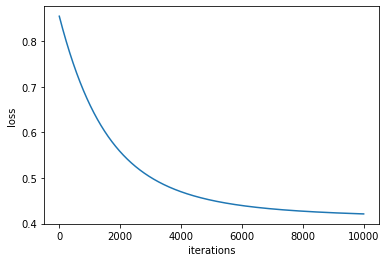

In [13]:
w,b,train_loss,test_loss=train(10000,0.001,x_train,x_test,y_train,y_test)

plt.plot(train_loss,label='train_set')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()



In [104]:
def stats(h,thr,y):
  pred = (h>thr).astype(int)
  #print(pred)
  #print(thr)
  FP=0
  FN=0
  TP=0
  TN=0
  for i in range(train_pred.shape[1]):
    if pred[:,i:i+1]==[[1]] and y[:,i:i+1]==[[1]]:
      TP+=1
    if pred[:,i:i+1]==[[1]] and y[:,i:i+1]==[[0]]:
      FP+=1
    if pred[:,i:i+1]==[[0]] and y[:,i:i+1]==[[1]]:
      FN+=1
    if pred[:,i:i+1]==[[0]] and y[:,i:i+1]==[[0]]:
      TN+=1
  #print(TP," ",TN," ",FP," ",FN)
  return TP,TN,FP,FN


In [117]:
h = sigmoid(numpy.dot(w.T,x_train)+b)
ht= sigmoid(numpy.dot(w.T,x_test)+b)
#print(train_pred.shape[1])
#print("train accuracy:  ",(100-numpy.mean(abs(train_pred-y_train).astype(int))*100))
#print("test accuracy:  ",(100-numpy.mean(abs(test_pred-y_test).astype(int))*100))
#print(y_test.shape)
TP,TN,FP,FN = stats(h,0.5,y_train)
print("Confusion Matrix (Train):-")
print("    P    N\n","T ",TP,"  ",TN,"\n F ",FP,"  ",FN,"\n")
print("Precision : ",(TP/(TP+FP)))
print("Recall    : ",(TP/(TP+FN)),"\n\n")
TP,TN,FP,FN = stats(ht,0.5,y_test)
print("Confusion Matrix (Test):-")
print("    P    N\n","T ",TP,"  ",TN,"\n F ",FP,"  ",FN)
print("\nPrecision : ",(TP/(TP+FP)))
print("Recall    : ",(TP/(TP+FN)))

Confusion Matrix (Train):-
    P    N
 T  176    2801 
 F  439    399 

Precision :  0.2861788617886179
Recall    :  0.3060869565217391 


Confusion Matrix (Test):-
    P    N
 T  24    299 
 F  55    45

Precision :  0.3037974683544304
Recall    :  0.34782608695652173


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future

<function matplotlib.pyplot.show>

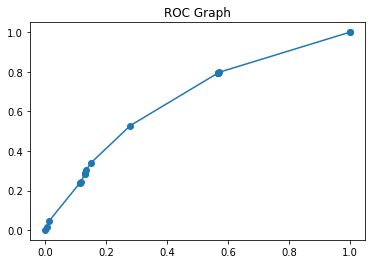

In [123]:
lsens = []
lspec = []
for i in range(0,100,5):
  thr=float(i/100)
  #print(thr)
  h = sigmoid(numpy.dot(w.T,x_train)+b)
  TP,TN,FP,FN = stats(h,thr,y_train)
  #print(TP," ",TN," ",FP," ",FN)
  #print(TP)
  sensitivity = TP/(TP+FN)
  specificity = TN/(TN+FP)
  lsens.append(sensitivity)
  lspec.append(1-specificity)
lsens=numpy.array(lsens)
lspec=numpy.array(lspec)
xaxis=numpy.arange(0.0, 1, 0.05)
fig, p = plt.subplots(1,1)
p.plot(lspec,lsens,marker = 'o')
p.set_title('ROC Graph')
plt.show

In [61]:
#changing gradient def
def gradient(x,y,w,b):
  weighted_g=5
  m = x.shape[1]
  h = sigmoid(numpy.dot(w.T,x)+b)
  delta_y = h-(weighted_g*y)
  dw = (1/(m))*numpy.dot(x,(delta_y).T)
  db = (1/(m))*(numpy.sum(h-y))
  return dw,db

13
i :  0   Losses :  0.7675184041478692    
train accuracy:   15.072083879423332
i :  1000   Losses :  0.6752294377516526    
train accuracy:   48.702490170380074
i :  2000   Losses :  0.618162329398226    
train accuracy:   77.90301441677589
i :  3000   Losses :  0.5835255910206343    
train accuracy:   78.00786369593709
i :  4000   Losses :  0.5635858328242707    
train accuracy:   78.1127129750983
i :  5000   Losses :  0.5536240146329463    
train accuracy:   78.0340760157274
i :  6000   Losses :  0.5506719272700975    
train accuracy:   78.0340760157274
i :  7000   Losses :  0.5527934293896236    
train accuracy:   78.0340760157274
i :  8000   Losses :  0.5586808128760726    
train accuracy:   78.0340760157274
i :  9000   Losses :  0.5674236048258864    
train accuracy:   78.0340760157274


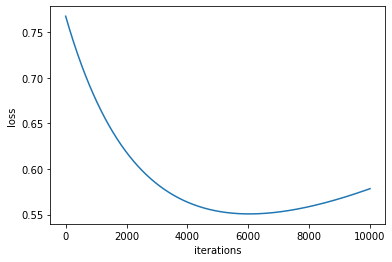

In [63]:
w,b,train_loss,test_loss=train(10000,0.001,x_train,x_test,y_train,y_test)

plt.plot(train_loss,label='train_set')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

In [64]:
h = sigmoid(numpy.dot(w.T,x_train)+b)
ht= sigmoid(numpy.dot(w.T,x_test)+b)
TP,TN,FP,FN = stats(h,0.5)
print("Confusion Matrix(train data: weighted gradient):-")
print("    P    N\n","T ",TP,"  ",TN,"\n F ",FP,"  ",FN,"\n\n")
if TP+FP!=0:
  print("Precision : ",(TP/(TP+FP)))
else:
  print("Precision : NA")
if TP+FN!=0:
  print("Recall    : ",(TP/(TP+FN)),"\n\n")
else:
  print("Recall    : NA\n\n")
TP,TN,FP,FN = stats(ht,0.5)
print("Confusion Matrix(test data: weighted gradient):-")
print("    P    N\n","T ",TP,"  ",TN,"\n F ",FP,"  ",FN)
if TP+FP!=0:
  print("\nPrecision : ",(TP/(TP+FP)))
else:
  print("\nPrecision : NA")
if TP+FN!=0:
  print("Recall    : ",(TP/(TP+FN)))
else:
  print("Recall    : NA")

Confusion Matrix(train data: weighted gradient):-
    P    N
 T  176    2801 
 F  439    399 


Precision :  0.2861788617886179
Recall    :  0.3060869565217391 


Confusion Matrix(test data: weighted gradient):-
    P    N
 T  24    299 
 F  55    45

Precision :  0.3037974683544304
Recall    :  0.34782608695652173
